In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

1. Analyze only the users and not the admins.
2. Analyze only the dates when there were both views and checker commits.
3. Use size of the font should be 8.
4. The size of the figure is (15,8).

In [3]:
query = """
SELECT c.commits, c.date, pv.views
FROM (
(SELECT date(timestamp) AS date,
        COUNT(*) AS commits
FROM checker 
WHERE uid NOT LIKE 'admin_%'
GROUP BY date) AS c 
INNER JOIN
(SELECT date(datetime) AS date,
        COUNT(*) AS views
FROM pageviews
WHERE uid NOT LIKE 'admin_%'
GROUP BY date) AS pv
ON c.date = pv.date
)
"""

In [4]:
df_visits_commits = pd.read_sql(query, con, index_col='date')
df_visits_commits

,commits,views
date,,
2020-04-17,23,1
2020-04-18,69,23
2020-04-19,33,15
2020-04-21,25,3
2020-04-22,28,1
2020-04-23,43,5
2020-04-25,104,1
2020-04-26,261,8
2020-04-28,5,2


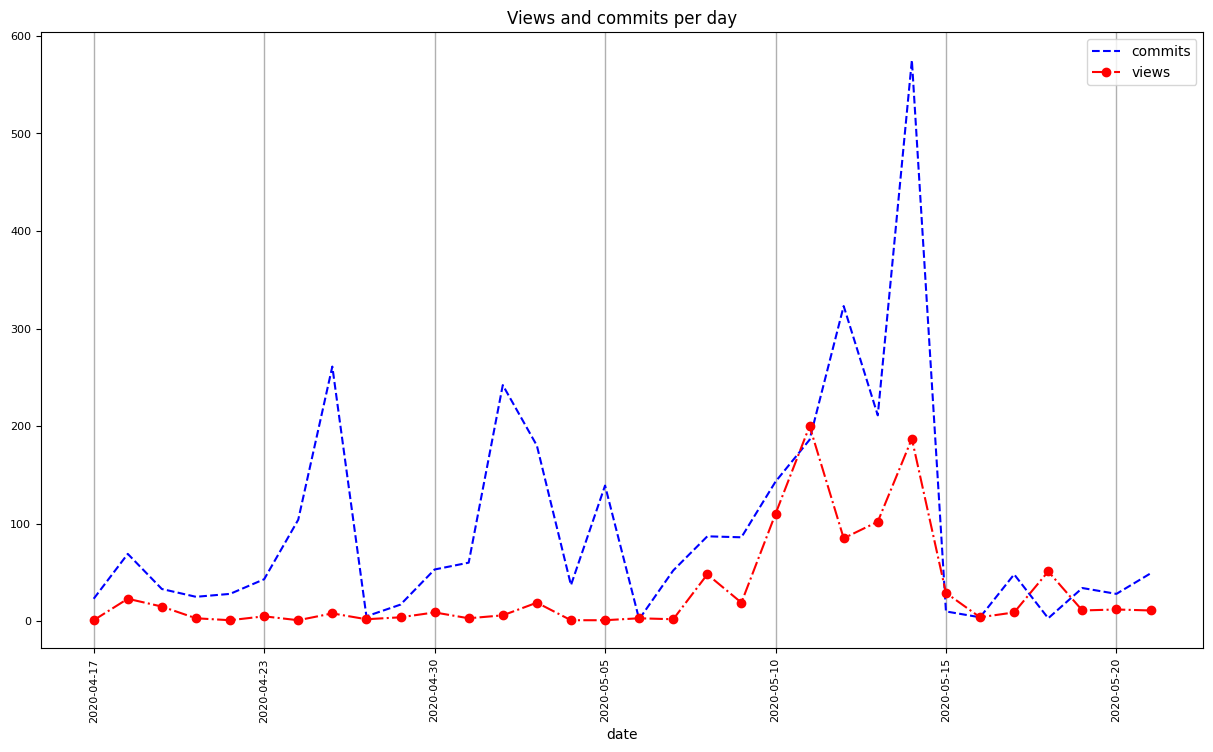

In [5]:
df_visits_commits.plot(
    title='Views and commits per day', 
    xlabel='date', 
    fontsize=8, 
    figsize=(15,8),
    style=['b--', 'ro-.'],
    rot=90
).grid(axis='x', linewidth=1)

5. At the end of your Jupyter Notebook create a markdown cell and insert the question: “How many times was the number of views larger than 150?” Insert:. “The answer is ___”. Put the number in the text instead of the underline.

2

In [6]:
con.close()